In [18]:
import os
import pandas as pd

# Change this to your actual folder path
data_folder = r"C:\Users\asus\Downloads\health api"

# ML and NLP file lists
ml_files = [
    'admissionDx.csv.gz', 'admissiondrug.csv.gz', 'allergy.csv.gz', 'apacheApsVar.csv.gz',
    'apachePatientResult.csv.gz', 'apachePredVar.csv.gz', 'carePlanCareProvider.csv.gz',
    'carePlanGeneral.csv.gz', 'carePlanGoal.csv.gz',
    'carePlanInfectiousDisease.csv.gz', 'customLab.csv.gz', 'diagnosis.csv.gz',
    'hospital.csv.gz', 'infusiondrug.csv.gz', 'intakeOutput.csv.gz', 'lab.csv.gz',
    'medication.csv.gz', 'microLab.csv.gz', 'nurseAssessment.csv.gz', 'nurseCare.csv.gz',
    'nurseCharting.csv.gz', 'pastHistory.csv.gz', 'patient.csv.gz', 'physicalExam.csv.gz',
    'respiratoryCare.csv.gz', 'respiratoryCharting.csv.gz', 'treatment.csv.gz',
     'vitalPeriodic.csv.gz'
    
]


nlp_files = ['note.csv.gz']

# Dictionaries to store data
ml_data = {}
nlp_data = {}

# Load ML files
for file in ml_files:
    path = os.path.join(data_folder, file)
    if os.path.exists(path):
        ml_data[file] = pd.read_csv(path, compression='gzip')
        print(f"✅ Loaded ML file: {file} | Shape: {ml_data[file].shape}")
    else:
        print(f" Missing ML file: {file}")

✅ Loaded ML file: admissionDx.csv.gz | Shape: (7578, 6)
✅ Loaded ML file: admissiondrug.csv.gz | Shape: (7417, 14)
✅ Loaded ML file: allergy.csv.gz | Shape: (2475, 13)
✅ Loaded ML file: apacheApsVar.csv.gz | Shape: (2205, 26)
✅ Loaded ML file: apachePatientResult.csv.gz | Shape: (3676, 23)
✅ Loaded ML file: apachePredVar.csv.gz | Shape: (2205, 51)
✅ Loaded ML file: carePlanCareProvider.csv.gz | Shape: (5627, 8)
✅ Loaded ML file: carePlanGeneral.csv.gz | Shape: (33148, 6)
✅ Loaded ML file: carePlanGoal.csv.gz | Shape: (3633, 7)
✅ Loaded ML file: carePlanInfectiousDisease.csv.gz | Shape: (112, 8)
✅ Loaded ML file: customLab.csv.gz | Shape: (30, 7)
✅ Loaded ML file: diagnosis.csv.gz | Shape: (24978, 7)
✅ Loaded ML file: hospital.csv.gz | Shape: (186, 4)
✅ Loaded ML file: infusiondrug.csv.gz | Shape: (38256, 9)
✅ Loaded ML file: intakeOutput.csv.gz | Shape: (100466, 12)
✅ Loaded ML file: lab.csv.gz | Shape: (434660, 10)
✅ Loaded ML file: medication.csv.gz | Shape: (75604, 15)
✅ Loaded ML f

C:\Users\asus\AppData\Local\Temp\ipykernel_15912\2869086496.py:32: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  ml_data[file] = pd.read_csv(path, compression='gzip')


✅ Loaded ML file: nurseAssessment.csv.gz | Shape: (91589, 8)
✅ Loaded ML file: nurseCare.csv.gz | Shape: (42080, 8)
✅ Loaded ML file: nurseCharting.csv.gz | Shape: (1477163, 8)
✅ Loaded ML file: pastHistory.csv.gz | Shape: (12109, 8)
✅ Loaded ML file: patient.csv.gz | Shape: (2520, 29)
✅ Loaded ML file: physicalExam.csv.gz | Shape: (84058, 6)
✅ Loaded ML file: respiratoryCare.csv.gz | Shape: (5436, 34)
✅ Loaded ML file: respiratoryCharting.csv.gz | Shape: (176089, 7)
✅ Loaded ML file: treatment.csv.gz | Shape: (38290, 5)
✅ Loaded ML file: vitalPeriodic.csv.gz | Shape: (1634960, 19)


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# # ---------------------------
# # Load tables
# # ---------------------------
patient = ml_data['patient.csv.gz']
admission = ml_data['admissionDx.csv.gz']
diagnosis = ml_data['diagnosis.csv.gz']
apache = ml_data['apachePatientResult.csv.gz']
apache_var = ml_data['apachePredVar.csv.gz']

medication = ml_data['medication.csv.gz']
infusion = ml_data['infusiondrug.csv.gz']
allergy = ml_data['allergy.csv.gz']
treatment = ml_data['treatment.csv.gz']
past_history =   ml_data['pastHistory.csv.gz']
careplan_infectious = ml_data['carePlanInfectiousDisease.csv.gz']

In [20]:
#define columns to keep

patient_cols = ['patientunitstayid','gender','ethnicity','age','hospitaldischargelocation','apacheadmissiondx']
admission_cols = ['patientunitstayid', 'admitdxtext', 'admitdxtext']
diagnosis_cols = ['patientunitstayid','diagnosisstring','icd9code','activeupondischarge']
# apache_cols = ['patientunitstayid','physicianspeciality','actualicumortality'
# 'actualhospitalmortality','preopmi', 'preopcardiaccath', 'ptcawithin24h']
# ...existing code...
apache_cols = ['patientunitstayid','physicianspeciality','actualicumortality',           # <-- comma added here
'actualhospitalmortality','preopmi','preopcardiaccath','ptcawithin24h'
]

apache_var_cols = [
    'patientunitstayid', 'gender', 'teachtype', 'region',
    'admitdiagnosis', 'thrombolytics', 'diedinhospital'
]
 
medication_cols = ['patientunitstayid', 'drugname', 'routeadmin', 
'frequency', 'prn'
]
infusion_drug_cols = ['patientunitstayid', 'drugname']
allergy_cols = ['patientunitstayid', 'drugname', 'allergytype', 'allergyname']
treatment_cols = ['patientunitstayid', 'treatmentstring', 'activeupondischarge']
past_history_cols = ['patientunitstayid', 'pasthistoryvalue', 'pasthistoryvaluetext']
careplan_infectious_cols = ['patientunitstayid', 'infectdiseasesite', 'infectdiseaseassessment', 'responsetotherapy', 'treatment']
# ...existing code...       
        
        

In [21]:
#checking patient columns

medication = ml_data['medication.csv.gz']
print(medication.head())


   medicationid  patientunitstayid  drugorderoffset  drugstartoffset  \
0       7278819             141765              134             1396   
1       9726266             141765                1             -188   
2      10293599             141765              115              856   
3      10871534             141765              114              316   
4      10128716             141765              115              856   

  drugivadmixture drugordercancelled  \
0              No                 No   
1              No                 No   
2              No                 No   
3              No                 No   
4              No                 No   

                                      drugname  drughiclseqno dosage  \
0                 WARFARIN SODIUM 5 MG PO TABS         2812.0    5 3   
1  5 ML VIAL : DILTIAZEM HCL 25 MG/5ML IV SOLN          182.0   15 3   
2                     ASPIRIN EC 81 MG PO TBEC         1820.0   81 3   
3                  DILTIAZEM HCL 30 MG

In [22]:
print(medication.columns)

Index(['medicationid', 'patientunitstayid', 'drugorderoffset',
       'drugstartoffset', 'drugivadmixture', 'drugordercancelled', 'drugname',
       'drughiclseqno', 'dosage', 'routeadmin', 'frequency', 'loadingdose',
       'prn', 'drugstopoffset', 'gtc'],
      dtype='object')


In [23]:
#filter columns
patient = patient[patient_cols]
admission = admission[admission_cols]
diagnosis = diagnosis[diagnosis_cols]
apache = apache[apache_cols]
apache_var = apache_var[apache_var_cols]
medication = medication[medication_cols]
infusion = infusion[infusion_drug_cols]
allergy = allergy[allergy_cols]
treatment = treatment[treatment_cols]
past_history = past_history[past_history_cols]
careplan_infectious = careplan_infectious[careplan_infectious_cols]



In [24]:
# Summarize counts [ for feature engineering ]
patient_summary = patient.groupby('patientunitstayid').size().reset_index(name='patient_count')
admission_summary = admission.groupby('patientunitstayid').size().reset_index(name='admission_count')
diagnosis_summary = diagnosis.groupby('patientunitstayid').size().reset_index(name='diagnosis_count')
apache_summary = apache.groupby('patientunitstayid').size().reset_index(name='apache_count')
apache_var_summary = apache_var.groupby('patientunitstayid').size().reset_index(name='apache_var_count')
medication_summary = medication.groupby('patientunitstayid').size().reset_index(name='medication_count')
infusion_summary = infusion.groupby('patientunitstayid').size().reset_index(name='infusion_count')
allergy_summary = allergy.groupby('patientunitstayid').size().reset_index(name='allergy_count')
treatment_summary = treatment.groupby('patientunitstayid').size().reset_index(name='treatment_count')
past_history_summary = past_history.groupby('patientunitstayid').size().reset_index(name='past_history_count')
careplan_infectious_summary = careplan_infectious.groupby('patientunitstayid').size().reset_index(name='careplan_infectious_count')



In [25]:
# Merge summary counts into merged
merged = patient.merge(apache, on='patientunitstayid', how='left')
merged = merged.merge(admission_summary, on='patientunitstayid', how='left')
merged = merged.merge(diagnosis_summary, on='patientunitstayid', how='left')
merged = merged.merge(apache_summary, on='patientunitstayid', how='left')
merged = merged.merge(apache_var_summary, on='patientunitstayid', how='left')
merged = merged.merge(medication_summary, on='patientunitstayid', how='left')
merged = merged.merge(infusion_summary, on='patientunitstayid', how='left')
merged = merged.merge(allergy_summary, on='patientunitstayid', how='left')
merged = merged.merge(treatment_summary, on='patientunitstayid', how='left')
merged = merged.merge(past_history_summary, on='patientunitstayid', how='left')
merged = merged.merge(careplan_infectious_summary, on='patientunitstayid', how='left')

In [26]:
# Convert counts to binary
for col in [
    'medication_count', 'infusion_count', 'allergy_count',
    'past_history_count', 'careplan_infectious_count', 'treatment_count'
]:
    if col in merged.columns:
        merged[col] = (merged[col] > 0).astype(int)

# Convert categorical columns to string (keep them categorical)
categorical_cols = [
    'gender', 'ethnicity', 'hospitaladmitsource', 'hospitaldischargestatus',
    'unittype', 'unitstaytype', 'unitdischargestatus',
    'admitdxname', 'diagnosisstring', 'icd9code', 'physicianspeciality',
    'physicianinterventioncategory', 'admitdiagnosis'
]

for col in categorical_cols:
    if col in merged.columns:
        merged[col] = merged[col].astype(str).fillna('Unknown')

# (Optional) Bin continuous values if you want them in association rules
# Example for creatinine
if 'creatinine' in merged.columns:
    merged['creatinine_bin'] = pd.cut(
        merged['creatinine'],
        bins=[-float('inf'), 1.0, 2.0, float('inf')],
        labels=['Low', 'Normal', 'High']
    ).astype(str)


In [27]:
categorical_cols = ['gender', 'ethnicity', 'admitdiagnosis']
categorical_cols = [col for col in categorical_cols if col in merged.columns]

for col in categorical_cols:
    merged[col] = merged[col].fillna('Unknown')


In [28]:
count_cols = ['past_history_count', 'allergy_count', 'medication_count',
              'treatment_count', 'careplan_infectious_count', 'infusion_count']

for col in count_cols:
    merged[col] = merged[col].apply(lambda x: 1 if x > 0 else 0)


In [29]:
assoc_cols = categorical_cols + count_cols
df_encoded = pd.get_dummies(merged[assoc_cols].astype(str))


In [30]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules = rules.sort_values(by='lift', ascending=False)


In [31]:
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


,antecedents,consequents,support,confidence,lift
3700,"(past_history_count_0, infusion_count_0)","(allergy_count_0, ethnicity_Caucasian, treatme...",0.055760,0.870968,5.323531
6125,"(past_history_count_0, infusion_count_0)","(allergy_count_0, careplan_infectious_count_0,...",0.055071,0.860215,5.317471
6118,"(careplan_infectious_count_0, past_history_cou...","(allergy_count_0, ethnicity_Caucasian, treatme...",0.055071,0.869565,5.314958
3696,"(past_history_count_0, ethnicity_Caucasian, in...","(allergy_count_0, treatment_count_0)",0.055760,0.983806,5.286591
6110,"(careplan_infectious_count_0, past_history_cou...","(allergy_count_0, treatment_count_0)",0.055071,0.983607,5.285521
6119,"(past_history_count_0, ethnicity_Caucasian, in...","(allergy_count_0, careplan_infectious_count_0,...",0.055071,0.971660,5.273342
1877,"(past_history_count_0, infusion_count_0)","(allergy_count_0, treatment_count_0)",0.062414,0.974910,5.238791
4341,"(careplan_infectious_count_0, past_history_cou...","(allergy_count_0, treatment_count_0)",0.061726,0.974638,5.237326
4345,"(past_history_count_0, infusion_count_0)","(allergy_count_0, careplan_infectious_count_0,...",0.061726,0.964158,5.232627
3701,"(past_history_count_0, ethnicity_Caucasian)","(allergy_count_0, treatment_count_0, infusion_...",0.055760,0.783871,5.215435


In [32]:
assoc_cols = ['gender', 'ethnicity', 'admitdiagnosis', 'past_history_count', 
              'allergy_count', 'medication_count', 'treatment_count']

# Only keep columns that exist in merged
assoc_cols = [col for col in assoc_cols if col in merged.columns]

# One-hot encode
df_encoded = pd.get_dummies(merged[assoc_cols].astype(str))

In [33]:
import sys
!{sys.executable} -m pip install mlxtend --upgrade


In [34]:
import mlxtend
print(mlxtend.__version__)



0.23.4


In [35]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Select columns for association mining
assoc_cols = categorical_cols + [
    'medication_count', 'infusion_count', 'allergy_count',
    'past_history_count', 'careplan_infectious_count', 'treatment_count',
    'creatinine_bin'  # add binned continuous columns
]
# Only keep columns that exist in merged
assoc_cols = [col for col in assoc_cols if col in merged.columns]

assoc_data = merged[assoc_cols]

# One-hot encode
assoc_encoded = pd.get_dummies(assoc_data, columns=assoc_cols, drop_first=False)

In [36]:
# Get frequent itemsets
frequent_itemsets = apriori(assoc_encoded, min_support=0.05, use_colnames=True)

# Generate rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Sort by confidence
rules = rules.sort_values(by="confidence", ascending=False)


In [37]:
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


                                             antecedents  \
7493   (careplan_infectious_count_0, ethnicity_Africa...   
19383  (infusion_count_0, careplan_infectious_count_0...   
19758  (infusion_count_0, careplan_infectious_count_0...   
4930   (infusion_count_1, gender_Female, allergy_coun...   
8784   (careplan_infectious_count_0, treatment_count_...   
2342   (treatment_count_1, gender_Male, allergy_count_1)   
14272  (careplan_infectious_count_0, treatment_count_...   
6223   (ethnicity_Caucasian, gender_Male, infusion_co...   
10234  (careplan_infectious_count_0, gender_Female, e...   
2381   (ethnicity_African American, treatment_count_1...   

                  consequents   support  confidence      lift  
7493   (past_history_count_1)  0.070675         1.0  1.089228  
19383  (past_history_count_1)  0.107159         1.0  1.089228  
19758  (past_history_count_1)  0.058743         1.0  1.089228  
4930   (past_history_count_1)  0.053006         1.0  1.089228  
8784   (past_histor

In [38]:
#NEW

In [39]:
categorical_cols = [['gender', 'ethnicity', 'past_history_count', 
              'allergy_count', 'medication_count', 'treatment_count']
]  # add more if needed
for col in categorical_cols:
    merged[col] = merged[col].fillna('Unknown')


In [40]:
count_cols = ['past_history_count', 'allergy_count', 'medication_count',
              'treatment_count', 'careplan_infectious_count', 'infusion_count']

for col in count_cols:
    merged[col] = merged[col].apply(lambda x: 1 if x > 0 else 0)


In [41]:
categorical_cols = ['gender', 'ethnicity']  # make sure only strings
count_cols = [
    'admission_count', 'diagnosis_count', 'apache_count', 'apache_var_count',
    'medication_count', 'infusion_count', 'allergy_count', 'treatment_count',
    'past_history_count', 'careplan_infectious_count'
]

# Combine them
assoc_cols = categorical_cols + count_cols


In [42]:
assoc_cols = categorical_cols + count_cols

df_encoded = pd.get_dummies(merged[assoc_cols].astype(str))



In [43]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules = rules.sort_values(by='lift', ascending=False)


In [44]:
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


,antecedents,consequents,support,confidence,lift
36575,"(past_history_count_0, apache_count_nan)","(allergy_count_0, admission_count_nan, infusio...",0.050711,0.846743,14.939706
36565,"(allergy_count_0, admission_count_nan, infusio...","(past_history_count_0, apache_count_nan)",0.050711,0.894737,14.939706
83612,"(allergy_count_0, admission_count_nan, carepla...","(past_history_count_0, apache_count_nan)",0.050482,0.894309,14.932561
83640,"(past_history_count_0, apache_count_nan)","(allergy_count_0, admission_count_nan, carepla...",0.050482,0.842912,14.932561
83631,"(careplan_infectious_count_0, past_history_cou...","(allergy_count_0, admission_count_nan, infusio...",0.050482,0.846154,14.929306
83623,"(allergy_count_0, admission_count_nan, infusio...","(careplan_infectious_count_0, past_history_cou...",0.050482,0.890688,14.929306
83161,"(past_history_count_0, treatment_count_0, apac...","(allergy_count_0, admission_count_nan, diagnos...",0.054153,0.940239,14.686601
83145,"(allergy_count_0, admission_count_nan, diagnos...","(past_history_count_0, treatment_count_0, apac...",0.054153,0.845878,14.686601
136100,"(allergy_count_0, admission_count_nan, diagnos...","(careplan_infectious_count_0, past_history_cou...",0.053924,0.842294,14.682867
136096,"(careplan_infectious_count_0, past_history_cou...","(allergy_count_0, admission_count_nan, diagnos...",0.053924,0.940000,14.682867


In [45]:
from mlxtend.frequent_patterns import apriori, association_rules

# Example: making a target column 'diedinhospital'
merged['diedinhospital'] = merged['diedinhospital'].fillna(0)  # fill missing if any
assoc_cols = numeric_cols + categorical_cols  # features for antecedents
df_encoded = pd.get_dummies(merged[assoc_cols].astype(str))

# Add the target
df_encoded['diedinhospital'] = merged['diedinhospital']


c:\ProgramData\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\ProgramData\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
c:\ProgramData\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


KeyError: 'diedinhospital'

In [46]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [47]:
target = 'past_history_count_1'  # replace with your target
target_rules = rules[rules['consequents'].apply(lambda x: target in x)]


In [48]:
target_rules = target_rules.sort_values(by=['lift', 'confidence'], ascending=False)


In [49]:
target_rules.head(10)
#!/usr/bin/env python3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
189015,"(apache_count_2.0, treatment_count_0, medicati...","(allergy_count_0, infusion_count_0, careplan_i...",0.100964,0.286829,0.061955,0.613636,2.139382,1.0,0.032996,1.845855,0.592385,0.190141,0.458246,0.414818
189006,"(careplan_infectious_count_0, apache_count_2.0...","(allergy_count_0, infusion_count_0, past_histo...",0.100046,0.296466,0.061955,0.619266,2.088825,1.0,0.032295,1.847836,0.579209,0.185185,0.458826,0.414122
170346,"(apache_count_2.0, treatment_count_0, medicati...","(allergy_count_0, infusion_count_0, careplan_i...",0.100964,0.293942,0.061955,0.613636,2.087609,1.0,0.032278,1.827444,0.579491,0.186079,0.452788,0.412205
189012,"(apache_count_2.0, apache_var_count_1.0, treat...","(allergy_count_0, infusion_count_0, careplan_i...",0.100964,0.293942,0.061955,0.613636,2.087609,1.0,0.032278,1.827444,0.579491,0.186079,0.452788,0.412205
168709,"(apache_count_2.0, treatment_count_0, medicati...","(allergy_count_0, infusion_count_0, past_histo...",0.100964,0.296466,0.062414,0.618182,2.085167,1.0,0.032482,1.842588,0.578867,0.186301,0.457285,0.414354
188982,"(careplan_infectious_count_0, treatment_count_...","(allergy_count_0, ethnicity_Caucasian, past_hi...",0.100046,0.303580,0.061955,0.619266,2.039880,1.0,0.031583,1.829152,0.566446,0.181330,0.453299,0.411674
170339,"(careplan_infectious_count_0, apache_count_2.0...","(allergy_count_0, ethnicity_Caucasian, past_hi...",0.100046,0.303580,0.061955,0.619266,2.039880,1.0,0.031583,1.829152,0.566446,0.181330,0.453299,0.411674
168706,"(apache_count_2.0, apache_var_count_1.0, treat...","(allergy_count_0, ethnicity_Caucasian, past_hi...",0.100964,0.303580,0.062414,0.618182,2.036309,1.0,0.031763,1.823958,0.566068,0.182428,0.451742,0.411888
127625,"(apache_count_2.0, treatment_count_0, medicati...","(allergy_count_0, ethnicity_Caucasian, past_hi...",0.100964,0.303580,0.062414,0.618182,2.036309,1.0,0.031763,1.823958,0.566068,0.182428,0.451742,0.411888
189014,"(apache_count_2.0, treatment_count_0, infusion...","(allergy_count_0, careplan_infectious_count_0,...",0.098669,0.312529,0.061955,0.627907,2.009118,1.0,0.031118,1.847579,0.557253,0.177398,0.458751,0.413072


In [50]:
target_rules['antecedents'] = target_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
target_rules['consequents'] = target_rules['consequents'].apply(lambda x: ', '.join(list(x)))


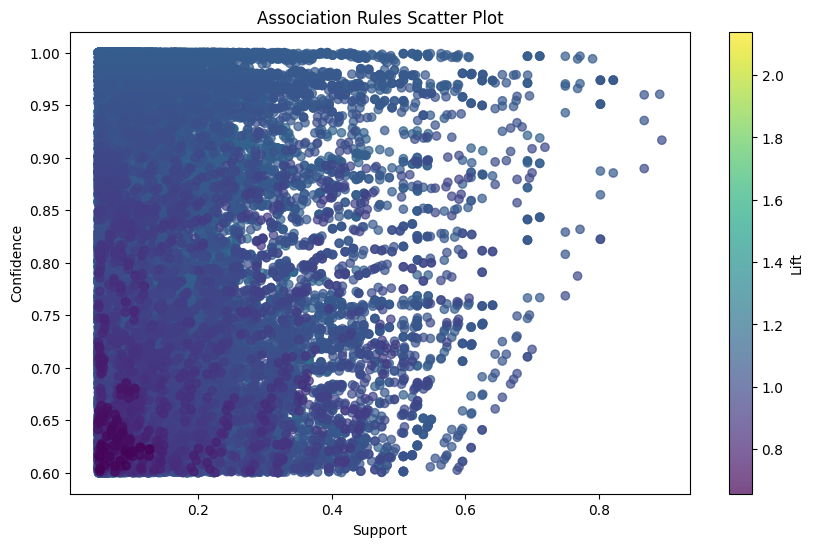

In [51]:
import matplotlib.pyplot as plt

# Plot support vs confidence, colored by lift
plt.figure(figsize=(10,6))
plt.scatter(target_rules['support'], target_rules['confidence'], 
            c=target_rules['lift'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules Scatter Plot')
plt.show()


In [52]:
# Save merged dataset to CSV
merged.to_csv("merged_data.csv", index=False)
print(" Merged dataset saved as merged_data.csv")


 Merged dataset saved as merged_data.csv
